In [11]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import math
import uproot
import pandas as pd
from enum import Enum

In [12]:
class Data_Samples(Enum):
    Signal_NonRes = -125
    Signal_Radion_M250 = -250
    Signal_Radion_M260 = -260
    Signal_Radion_M270 = -270
    Signal_Radion_M280 = -280
    Signal_Radion_M300 = -300
    Signal_Radion_M320 = -320
    Signal_Radion_M340 = -340
    Signal_Radion_M350 = -350
    Signal_Radion_M400 = -400
    Signal_Radion_M450 = -450
    Signal_Radion_M500 = -500
    Signal_Radion_M550 = -550
    Signal_Radion_M600 = -600
    Signal_Radion_M650 = -650
    Signal_Radion_M750 = -750
    Signal_Radion_M800 = -800
    Signal_Radion_M900 = -900
    Data = 0
    TT = 1
    DY = 2
    Wjets= 3
    SM_Higgs = 4
    other_bkg = 5

In [13]:
#path = "/gpfs/ddn/cms/user/cmsdas/2019/hh_bbtautau/anaTuples/"
path = "/Users/Tita/Desktop/Run2_analysis_hh_bbtautau/anaTuples/"

samples = {'eTau': "eTau_tuple.root", 'muTau': "muTau_tuple.root", 'tauTau': "tauTau_tuple.root"} 
channel = "tauTau"

#file = ROOT.TFile.Open(path+samples[channel])
#tree = file.Get(channel)

tree = uproot.open(path+samples[channel])[channel]
#print(tree.arrays(["sample_id", "weight"]))
sample_id = tree.array("sample_id")
weight = tree.array("weight")

In [35]:
#member = Data_Samples.Signal_Radion_M300
#print(member.name)
#print(member.value)
s = pd.Series(weight, index=sample_id)
#print(s[member.value])

for name, member in Data_Samples.__members__.items():
    #print(name,member.value)
    value = member.value
    print(s["value"])

KeyError: 'value'

In [8]:
n_signal = 0
n_bkg = 0
events = np.zeros((tree.numentries, 2))
n = 0
signals = {}

for entry in tree :
    #if(entry.sample_id < 0):
     #   signals[-entry.sample_id] += 1
    if(entry.sample_id > 0):
        n_bkg += 1
    events[n, 0] = entry.pt_1
    events[n, 1] = entry.pt_2
    n += 1

for signal in signals :
    print(signals[300],n_bkg)

TypeError: 'TTree' object is not iterable

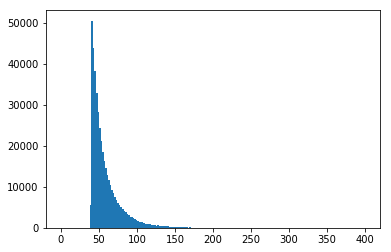

In [26]:
bins_x = np.linspace(0, 400, 200)
pt1 = plt.hist(events[:, 1], bins_x)
plt.show()